<h1>importing the libraries</h1>

In [3]:
import xgboost as xgb
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


<h1>importing the datasets</h1>

In [4]:
data=pd.read_csv("../Data/cleaned_data.csv")
data.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,683.50,17.00,64.0,553148.440,553148.440,0,0.0,0.0,0.0,0.00,...,0.000,50.00,101635944.0,9.5,10.00,0.000,0.000000,0.00,141.5,1
1,1745.92,16.12,64.0,29919.545,29919.545,0,0.0,0.0,0.0,0.04,...,1.569,52.28,84696616.0,9.5,10.05,2.152,11.785338,0.23,141.5,1
2,2830.36,15.79,64.0,27075.605,27075.605,0,0.0,0.0,0.0,0.06,...,7.450,53.25,84696616.0,9.5,10.35,10.555,113.675460,0.53,141.5,1
3,4087.50,16.89,64.0,19660.156,19660.156,0,0.0,0.0,0.0,0.00,...,0.873,50.16,84696616.0,9.5,10.03,1.236,4.490081,0.18,141.5,1
4,3916.00,17.00,64.0,270322.780,270322.780,0,0.0,0.0,0.0,0.00,...,0.000,50.00,84696616.0,9.5,10.00,0.000,0.000000,0.00,141.5,1


In [5]:
data.info

<bound method DataFrame.info of          Header_Length  Protocol Type  Duration          Rate         Srate  \
0               683.50          17.00      64.0  553148.44000  553148.44000   
1              1745.92          16.12      64.0   29919.54500   29919.54500   
2              2830.36          15.79      64.0   27075.60500   27075.60500   
3              4087.50          16.89      64.0   19660.15600   19660.15600   
4              3916.00          17.00      64.0  270322.78000  270322.78000   
...                ...            ...       ...           ...           ...   
7160826          54.00           6.00      64.0     605.44196     605.44196   
7160827          54.00           6.00      64.0     605.44196     605.44196   
7160828          54.00           6.00      64.0     605.44196     605.44196   
7160829          54.00           6.00      64.0     605.44196     605.44196   
7160830          54.00           6.00      64.0     605.44196     605.44196   

         Drate  fin

<h1>split the data to dependent & independent variables</h1>

In [6]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]


<h1>split the dataset to train & test data</h1>

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33,random_state=42,stratify=y)

<h1>Standardization</h1>

In [8]:
scaler=StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[-1.07107022e-01, -1.11934000e+00, -8.88773581e-02, ...,
        -1.23966637e-01, -3.93299606e-01,  8.57321842e-04],
       [-1.07107022e-01, -1.11934000e+00, -8.88773581e-02, ...,
        -1.23966637e-01, -3.93299606e-01,  8.57321842e-04],
       [-8.68060343e-02, -3.24692339e-01, -1.97112216e+00, ...,
         6.04381137e-01,  3.47242451e+00, -4.73530845e+00],
       ...,
       [-1.02706913e-01, -1.09391127e+00, -8.88773581e-02, ...,
        -1.04760342e-01,  2.50987747e-01,  8.57321842e-04],
       [-1.06764758e-01, -3.24692339e-01,  5.46255352e+00, ...,
        -1.23843130e-01,  3.90194942e+00,  4.74162131e+00],
       [-9.90317071e-02, -3.07210090e-01, -8.88773581e-02, ...,
        -1.23226125e-01,  7.91777863e-02,  8.57321842e-04]],
      shape=(2363075, 37))

<h1>training the model XGboost</h1>

In [10]:
model_xgb = xgb.XGBClassifier(
    n_estimators=100,
    scale_pos_weight=36,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)


model_xgb.fit(x_train, y_train)

/home/ash/Documents/IoT-Intrusion-Detection/.venv/lib/python3.12/site-packages/xgboost/training.py:199: UserWarning: [02:42:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

<h3>prdeict the test data</h3>

In [11]:
y_pred= model_xgb.predict(x_test)

<h2>the metrics </h2>

<h4>the accuracy </h4>

In [12]:
probs = model_xgb.predict_proba(x_test)[:, 1]
# Print the "Big Three" (Precision, Recall, F1)
print(classification_report(y_test, y_pred))

# 3. Print Results
print(f"ROC-AUC: {roc_auc_score(y_test, probs)}")

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     63336
           1       1.00      1.00      1.00   2299739

    accuracy                           1.00   2363075
   macro avg       1.00      0.94      0.97   2363075
weighted avg       1.00      1.00      1.00   2363075

ROC-AUC: 0.9999642864805967


In [13]:
acc=accuracy_score(y_pred,y_test)
print("the accuracy is:",acc)

the accuracy is: 0.9966590142081821


<h4>the confusion matrix</h4>

In [14]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[  55494      53]
 [   7842 2299686]]


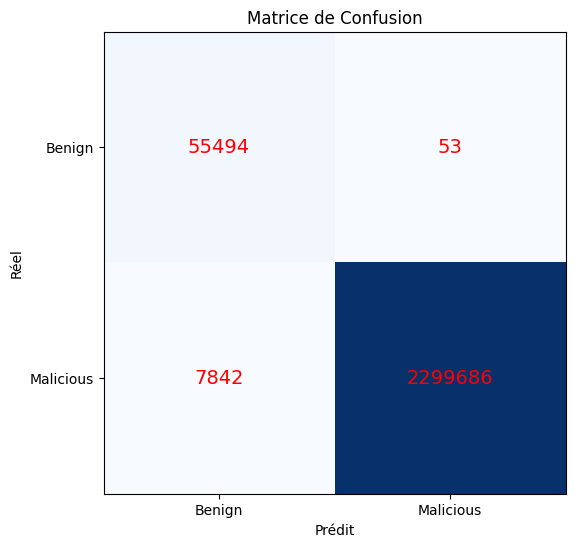

In [15]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm, cmap=plt.cm.Blues)  # couleur

# Ajouter les valeurs à l’intérieur des cases
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="red", fontsize=14)

# Titres et labels
ax.set_xlabel("Prédit")
ax.set_ylabel("Réel")
ax.set_title("Matrice de Confusion")
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["Benign", "Malicious"])
ax.set_yticklabels(["Benign", "Malicious"])

plt.show()


On a trouvé que l accuracy de notre model est presque 0.999 ce qui est inquiètant : c'est l accuracy paradox du au diséquilibre de nos données !

<h2>balancing the data</h2>

In [16]:
model2 = xgb.XGBClassifier(
    scale_pos_weight=36, # Donne 36x plus d'importance au trafic bénin
    n_estimators=100,
    max_depth=6,
    tree_method='hist' # Accélère l'entraînement sur de gros datasets
)
model2.fit(x_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [17]:
y_pred2=model2.predict(x_test)


In [22]:
acc2=classification_report(y_pred2,y_test)
print("the accuracy is :",acc2)

the accuracy is :               precision    recall  f1-score   support

           0       0.92      1.00      0.96     58282
           1       1.00      1.00      1.00   2304793

    accuracy                           1.00   2363075
   macro avg       0.96      1.00      0.98   2363075
weighted avg       1.00      1.00      1.00   2363075



In [19]:
cm2=confusion_matrix(y_pred2,y_test)
print(cm2)

[[  58145     147]
 [   5191 2299592]]


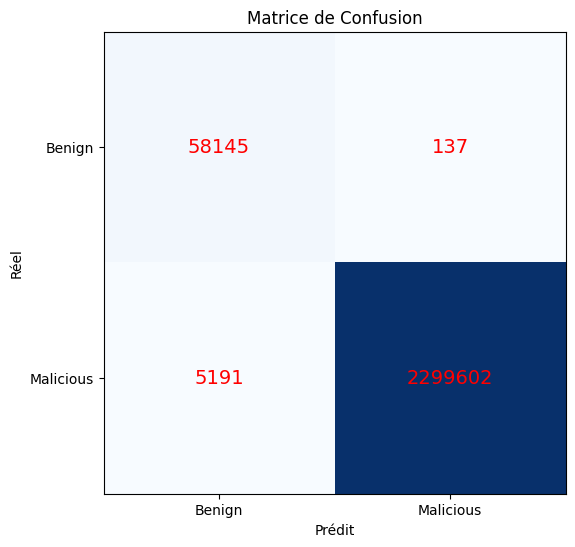

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(cm2, cmap=plt.cm.Blues)  # couleur

# Ajouter les valeurs à l’intérieur des cases
for i in range(cm2.shape[0]):
    for j in range(cm2.shape[1]):
        ax.text(j, i, cm2[i, j], ha="center", va="center", color="red", fontsize=14)

# Titres et labels
ax.set_xlabel("Prédit")
ax.set_ylabel("Réel")
ax.set_title("Matrice de Confusion")
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xticklabels(["Benign", "Malicious"])
ax.set_yticklabels(["Benign", "Malicious"])

plt.show()


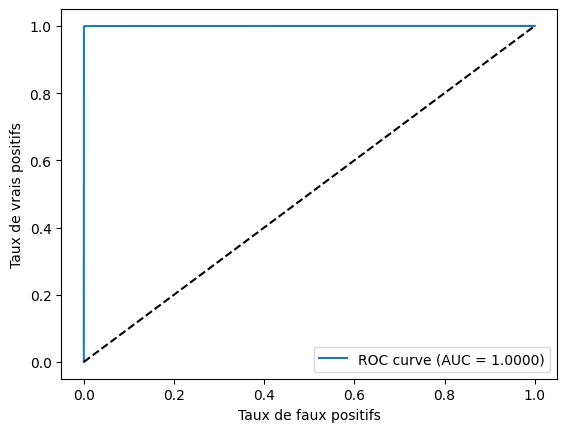

In [21]:
from sklearn.metrics import roc_curve, auc

y_probs = model2.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--') # Ligne de hasard
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.legend()
plt.show()

<h3>conclusion<h3>

Avec l’utilisation du modèle <i>XGboost</i>, le système de classification a atteint une accuracy de [99.7%], ce qui indique, à première vue, une performance globale élevée. Toutefois, étant donné le déséquilibre de la variable cible entre les classes benign et malicious, cette métrique à elle seule peut être trompeuse et conduire à ce que l’on appelle l’accuracy paradox. Afin de garantir une évaluation plus fiable du modèle, les métriques Recall et F1-score ont également été analysées. Ces indicateurs permettent de mesurer respectivement la capacité du modèle à détecter correctement les instances malicious et l’équilibre entre la précision et le rappel. Les valeurs obtenues pour le recall et le F1-score confirment que la performance du modèle ne repose pas uniquement sur la prédiction majoritaire de la classe dominante, mais qu’il parvient effectivement à identifier les comportements malveillants de manière pertinente.